In [1]:
import pandas as pd 
import numpy as np 
from os import listdir

In [73]:
import jdatetime
def index_corrector(df):
    ll=len(df['تاریخ'])
    for index,item in enumerate(df['تاریخ']):
        print(f'\r {index} from {ll}',end='')
        l = item.split('/')
        gre = jdatetime.date(int(l[0]),int(l[1]),int(l[2])).togregorian()
        year = str(gre.year)
        mon = str(gre.month)
        if len(str(mon))==1:
            mon='0'+mon
        day = str(gre.day) 
        if len(str(day))==1:
            day='0'+day
    
        df.loc[index,'تاریخ'] = year+'-'+mon+'-'+day
    return df 

To find the best hourly data set for polutant concentrations in Tehran, I downloaded all data sets available from http://airnow.tehran.ir/home/DataArchive.aspx for different stations in Tehran. Here we want to loop through all these data sets and find the percentage of missing values for each column and then pick the data with the least nubmer of nan values. 

In [3]:
l = listdir('excels/')[1:]
names =  ['ایستگاه','تاریخ','ساعت','O3 ppb',	'CO ppm',	'NO ppb',	'NO2 ppb',	'NOx ppb',	'SO2 ppb',	'PM 10 ug/m3',	'PM 2.5 ug/m3']

In [6]:
l

['اقدسیه.منطقه1.xlsx',
 'بهاران.xlsx',
 'تربیت.مدرس.منطقه6.xlsx',
 'دروس.منطقه3.xlsx',
 'ستاد.بحران.منطقه7.xlsx',
 'شادآباد.منطقه18.xlsx',
 'شریف.منطقه2.xlsx',
 'شهرداری.منطقه.2.xlsx',
 'شهرداری.منطقه.4.xlsx',
 'شهرداری.منطقه10.xlsx',
 'شهرداری.منطقه11.xlsx',
 'شهرداری.منطقه16.xlsx',
 'شهرداری.منطقه19.xlsx',
 'شهرداری.منطقه21.xlsx',
 'شهرداری.منطقه22.xlsx',
 'صدر.منطقه3.xlsx',
 'مسعودیه.منطقه15.xlsx',
 'میدان.فتح.منطقه9.xlsx',
 'پارک.رز.منطقه22.xlsx',
 'پونک.xlsx',
 'پیروزی.منطقه13.xlsx',
 'گلبرگ.منطقه8.xlsx']

The data sets that we have from  http://airnow.tehran.ir/home/DataArchive.aspx has some missing days and hours which are not even included in the data set. first we convert these data sets to csv files:

In [9]:
for item in l:
    df = pd.read_excel('excels/'+item, header = None,names = names)
    df = df.drop([df.index[0],df.index[1]])
    df.to_csv('csv/%s.csv'%item.split('.xlsx')[0],encoding = 'utf8',index = False)
    #dff.loc[item] = 1-df[names[3:]].isna().sum()/len(df)

In [77]:
l = listdir('csv/')
for item in l:
    print(item)
    df = pd.read_csv('csv/'+item)
    df=index_corrector(df)
    df.rename(columns = {'تاریخ':'date', 'ساعت': 'hour' , 'ایستگاه':'station'},inplace=True)
    df.date = pd.to_timedelta(df['hour'], unit='H') + pd.to_datetime(df['date'])
    df.set_index('date',inplace=True)
    idx = pd.date_range(df.index[0], '2021-06-1',freq='h')[:-1]
    df = df.reindex(idx, fill_value=np.nan)
    df.drop('hour',inplace=True,axis=1)
    df['station'] = df['station'][df['station'].notnull()][0]
    df.to_csv('corrected-stations/c-'+item,date_format='%Y-%m-%d %H:%M:%S')


اتوبان.محلاتی.منطقه14.csv
 82976 from 82977اقدسیه.منطقه1.csv
 91114 from 91115بهاران.csv
 9717 from 9718تربیت.مدرس.منطقه6.csv
 71657 from 71658دروس.منطقه3.csv
 41399 from 41400ستاد.بحران.منطقه7.csv
 89817 from 89818شادآباد.منطقه18.csv
 80859 from 80860شریف.منطقه2.csv
 76972 from 76973شهرداری.منطقه.2.csv
 64265 from 64266شهرداری.منطقه.4.csv
 73230 from 73231شهرداری.منطقه10.csv
 71214 from 71215شهرداری.منطقه11.csv
 71931 from 71932شهرداری.منطقه16.csv
 88570 from 88571شهرداری.منطقه19.csv
 137 from 68515C:\Users\zahra\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
 68514 from 68515شهرداری.منطقه21.csv
 62905 from 62906شهرداری.منطقه22.csv
 27203 from 27204صدر.منطقه3.csv
 46640 from 46641مسعودیه.منطقه15.csv
 86468 from 86469میدان.فتح.منطقه9.csv
 89192 from 89193پارک.رز.منطقه22.csv
 61474 from 

Here is the result. Each number shows the percentag of the data that is not nan. 

In [92]:
l = listdir('corrected-stations/')
dff = pd.DataFrame(columns=names[3:],index=l)
for item in l:
    df = pd.read_csv('corrected-stations/'+item,index_col=0)
    dff.loc[item] = 1-df[names[3:]].isna().sum()/len(df)


C:\Users\zahra\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [91]:
dff

,O3 ppb,CO ppm,NO ppb,NO2 ppb,NOx ppb,SO2 ppb,PM 10 ug/m3,PM 2.5 ug/m3
c-اتوبان.محلاتی.منطقه14.csv,0.461041,0.482079,0.577614,0.577865,0.577865,0.525345,0.744385,0.0
c-اقدسیه.منطقه1.csv,0.653377,0.843455,0.710362,0.712108,0.712045,0.468549,0.678806,0.770483
c-بهاران.csv,0.022909,0.088125,0.09329,0.093396,0.093258,0.092713,0.084369,0.0
c-تربیت.مدرس.منطقه6.csv,0.694069,0.764969,0.771031,0.774237,0.774237,0.710486,0.84283,0.819116
c-دروس.منطقه3.csv,0.166468,0.296738,0.198798,0.200972,0.200669,0.144835,0.061449,0.171727
c-ستاد.بحران.منطقه7.csv,0.675105,0.829214,0.783483,0.786351,0.786341,0.664903,0.712491,0.756668
c-شادآباد.منطقه18.csv,0.604638,0.555448,0.796072,0.801537,0.801537,0.60304,0.875751,0.785529
c-شریف.منطقه2.csv,0.684578,0.620207,0.732207,0.732358,0.732358,0.612889,0.898876,0.817409
c-شهرداری.منطقه.2.csv,0.61737,0.817101,0.487643,0.487643,0.487643,0.431605,0.749569,0.720116
c-شهرداری.منطقه.4.csv,0.477112,0.604078,0.541677,0.54519,0.545107,0.406504,0.265809,0.506932


In [138]:
dff.max()

O3 ppb          0.719905
CO ppm          0.951667
NO ppb          0.815171
NO2 ppb         0.815182
NOx ppb         0.815161
SO2 ppb         0.932269
PM 10 ug/m3     0.898876
PM 2.5 ug/m3    0.861684
dtype: object

# PM 10

In [2]:
pm = pd.read_csv('corrected-stations/c-شریف.منطقه2.csv',index_col=0,parse_dates=True)[['station','PM 10 ug/m3']]

In [3]:
pm

,station,PM 10 ug/m3
2012-05-16 13:00:00,شریف.منطقه2,234.0
2012-05-16 14:00:00,شریف.منطقه2,127.0
2012-05-16 15:00:00,شریف.منطقه2,119.0
2012-05-16 16:00:00,شریف.منطقه2,129.0
2012-05-16 17:00:00,شریف.منطقه2,132.0
...,...,...
2021-05-31 19:00:00,شریف.منطقه2,43.0
2021-05-31 20:00:00,شریف.منطقه2,32.0
2021-05-31 21:00:00,شریف.منطقه2,29.0
2021-05-31 22:00:00,شریف.منطقه2,45.0


<AxesSubplot:>

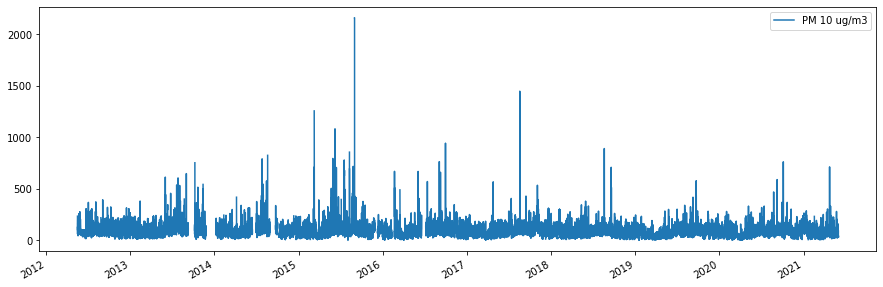

In [4]:
pm.drop([pm['PM 10 ug/m3'].idxmax()]).plot(figsize=(15,5))

In [262]:
for year in range(2012,2022):
    print(year,'\t',pm.loc[str(year)]['PM 10 ug/m3'].isna().sum()/len(pm[str(year)]))

2012 	 0.09061194842927184
2013 	 0.2458904109589041
2014 	 0.25490867579908677
2015 	 0.1228310502283105
2016 	 0.09961293260473589
2017 	 0.031164383561643836
2018 	 0.030136986301369864
2019 	 0.02591324200913242
2020 	 0.029143897996357013
2021 	 0.04359823399558499
<ipython-input-262-1db349c4c959>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(year,'\t',pm.loc[str(year)]['PM 10 ug/m3'].isna().sum()/len(pm[str(year)]))


In [263]:
pm.loc['2017':'2021']['PM 10 ug/m3'].isna().sum()/len(pm.loc['2017':'2021'])

0.030448717948717948

In [6]:
final = pm.loc['2017':'2021']

<AxesSubplot:>

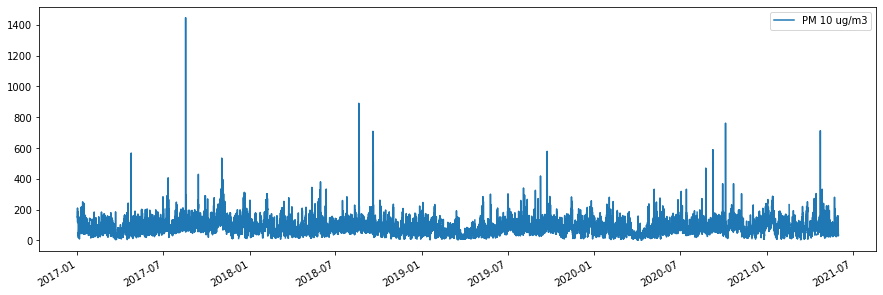

In [7]:
final.drop(final.index[np.argmax(final['PM 10 ug/m3'])]).plot(figsize = (15,5))

In [8]:
final_10 = final.drop([final['PM 10 ug/m3'].idxmax()])

In [9]:
final_10

,station,PM 10 ug/m3
2017-01-01 00:00:00,شریف.منطقه2,159.0
2017-01-01 01:00:00,شریف.منطقه2,210.0
2017-01-01 02:00:00,شریف.منطقه2,197.0
2017-01-01 03:00:00,شریف.منطقه2,179.0
2017-01-01 04:00:00,شریف.منطقه2,144.0
...,...,...
2021-05-31 19:00:00,شریف.منطقه2,43.0
2021-05-31 20:00:00,شریف.منطقه2,32.0
2021-05-31 21:00:00,شریف.منطقه2,29.0
2021-05-31 22:00:00,شریف.منطقه2,45.0


In [12]:
final_10.to_csv('pm_10.csv',date_format='%Y-%m-%d %H:%M:%S')

# PM 2.5

In [13]:
pm_25 = pd.read_csv('corrected-stations/c-صدر.منطقه3.csv',index_col=0,parse_dates=True)[['station','PM 2.5 ug/m3']]

In [14]:
pm_25

,station,PM 2.5 ug/m3
2015-05-18 12:00:00,صدر.منطقه3,NaN
2015-05-18 13:00:00,صدر.منطقه3,NaN
2015-05-18 14:00:00,صدر.منطقه3,NaN
2015-05-18 15:00:00,صدر.منطقه3,NaN
2015-05-18 16:00:00,صدر.منطقه3,NaN
...,...,...
2021-05-31 19:00:00,صدر.منطقه3,7.0
2021-05-31 20:00:00,صدر.منطقه3,7.0
2021-05-31 21:00:00,صدر.منطقه3,7.0
2021-05-31 22:00:00,صدر.منطقه3,7.0


<AxesSubplot:>

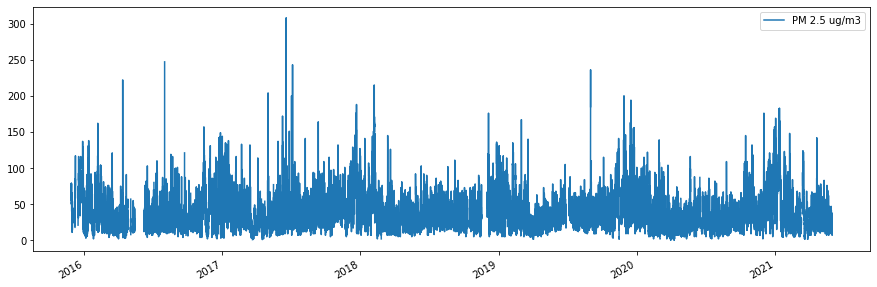

In [15]:
pm_25.drop([pm_25['PM 2.5 ug/m3'].idxmax()]).plot(figsize=(15,5))

In [271]:
for year in range(2015,2022):
    print(year,'\t',pm_25[str(year)]['PM 2.5 ug/m3'].isna().sum()/len(pm_25[str(year)]))

2015 	 0.9293040293040293
2016 	 0.19820127504553733
2017 	 0.02773972602739726
2018 	 0.09178082191780822
2019 	 0.05707762557077625
2020 	 0.04223588342440802
2021 	 0.01793598233995585
<ipython-input-271-ad943bdf823d>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(year,'\t',pm_25[str(year)]['PM 2.5 ug/m3'].isna().sum()/len(pm_25[str(year)]))


In [272]:
pm_25.loc['2017':'2021']['PM 2.5 ug/m3'].isna().sum()/len(pm_25.loc['2017':'2021'])

0.05125620347394541

In [16]:
final_25 = pm_25.loc['2017':'2021'].drop([pm_25.loc['2017':'2021']['PM 2.5 ug/m3'].idxmax()])

<AxesSubplot:>

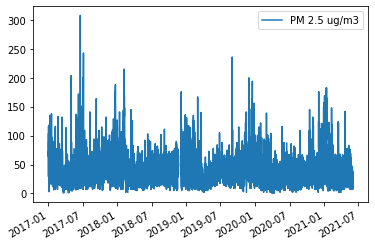

In [17]:
final_25.plot()

In [19]:
pm_25.loc['2017':'2021'].drop([pm_25.loc['2017':'2021']['PM 2.5 ug/m3'].idxmax()]).to_csv('pm_25.csv',date_format='%Y-%m-%d %H:%M:%S')

We are interested in the PM 2.5 and PM 10 pollutants which is the main cause of air pollution in Tehran. As it is seen, the Shahrdari of district 22's station has the most complete data for PM 2.5. 14 percent of data is missing for this pollutant in this station